<b> Exercise 2)</b> <br>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def matr(eps):
  A = np.array([[1, 1, 1], [eps, 0, 0],[0, eps, 0],[0, 0, eps]])
  print("Matrix A:\n", A.astype(str))
  C = np.dot(A.T, A)
  print("Covariance matrix:\n", C.astype(str))
  Lambda, _ = np.linalg.eig(C)
  print('Eigen Value:\n', Lambda.astype(str))
  s = np.sqrt(sorted(Lambda, reverse=True))
  print("Singular value via PCA:\n", s.astype(str))
  u, s_, v = np.linalg.svd(A)
  print("Singular value via SVD:\n", s_.astype(str))

In [3]:
eps = 1.0E-7
matr(eps)

Matrix A:
 [['1.0' '1.0' '1.0']
 ['1e-07' '0.0' '0.0']
 ['0.0' '1e-07' '0.0']
 ['0.0' '0.0' '1e-07']]
Covariance matrix:
 [['1.00000000000001' '1.0' '1.0']
 ['1.0' '1.00000000000001' '1.0']
 ['1.0' '1.0' '1.00000000000001']]
Eigen Value:
 ['9.769962616701378e-15' '3.0000000000000098' '1.004859173557616e-14']
Singular value via PCA:
 ['1.73205080756888' '1.0024266424819404e-07' '9.8843121241194e-08']
Singular value via SVD:
 ['1.7320508075688803' '1e-07' '1e-07']


In [4]:
eps = 1.0E-8
matr(eps)

Matrix A:
 [['1.0' '1.0' '1.0']
 ['1e-08' '0.0' '0.0']
 ['0.0' '1e-08' '0.0']
 ['0.0' '0.0' '1e-08']]
Covariance matrix:
 [['1.0' '1.0' '1.0']
 ['1.0' '1.0' '1.0']
 ['1.0' '1.0' '1.0']]
Eigen Value:
 ['-2.220446049250313e-16' '3.0' '0.0']
Singular value via PCA:
 ['1.7320508075688772' '0.0' 'nan']
Singular value via SVD:
 ['1.7320508075688776' '1e-08' '9.999999999999995e-09']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


Question 2.c <br>
Problem is one of the eigen value is negative for which there exist no real square root, hence the error.

Question 2.d </br>
All the diagonal elements of a covariance matrx should be real, however in the above case as we can see,  we got one of the eigen values as negative whose square root is not a real number and thus one wrong result in the singular values calculation via PCA

<b>Exercise 3</b>

In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
file = 'train.csv'
with open(file, 'r') as f:
      data = pd.read_csv(f, delimiter=',',header=None)
labels = data.iloc[:,-1]
data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)

In [0]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [0]:
pca = PCA()
projections = pca.fit_transform(data_scaled)
projections = projections[:,0:2]

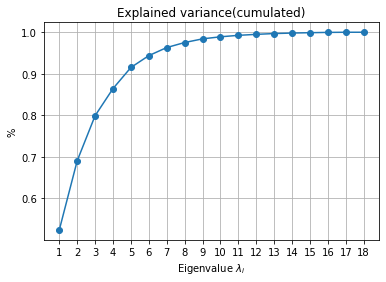

In [9]:
import numpy as np
cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), cumulative, marker='o')
#plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(np.arange(1, 19))
plt.title('Explained variance(cumulated)')
plt.xlabel('Eigenvalue $\lambda_i$')
plt.ylabel('%')
plt.grid(True)
plt.draw()

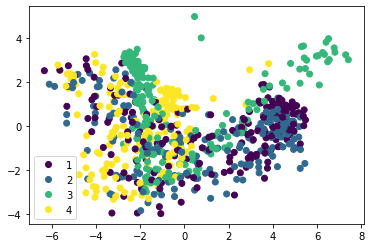

In [10]:
import numpy as np
plt.figure()
ax = plt.axes()
scatter = ax.scatter(projections[:,0], projections[:,1], c=labels)
ax.legend(handles=scatter.legend_elements(num=[1,2,3,4])[0], labels=['1','2','3','4'])
plt.draw()

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [0]:
clf = LDA()
proj = clf.fit_transform(data, labels)[:,0:2]

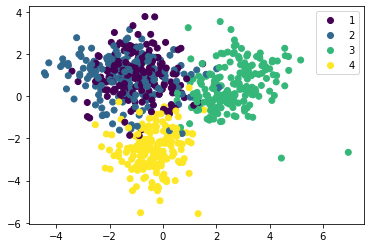

In [13]:
plt.figure()
ax = plt.axes()
scatter = ax.scatter(proj[:,0], proj[:,1], c=labels)
ax.legend(handles=scatter.legend_elements(num=[1,2,3,4])[0], labels=['1','2','3','4'])
plt.draw()